# KNN回归算法实现与应用

## 内容回顾

回顾我们在 K 近邻实验中学习过的内容。当使用 K 近邻算法完成分类任务时，需要的步骤有：

* 数据准备：通过数据清洗，数据处理，将每条数据整理成向量。

* 计算距离：计算测试数据与训练数据之间的距离。

* 寻找邻居：找到与测试数据距离最近的 K 个训练数据样本。

* 决策分类：根据决策规则，从 K 个邻居得到测试数据的类别。

![image.png](https://cdn.aibydoing.com/aibydoing/images/document-uid214893labid7506timestamp1546417333161.gif)



其中，「决策分类」是决定未知样本类别的关键步骤。那么，当我们将 K 近邻算法用于回归预测时，实际上只需要将这一步修改为适合于回归问题的流程即可。

* 分类问题：根据 K 个邻居的类别，多数表决得到未知样本的类别。

* 回归问题：根据 K 个邻居的目标值，计算平均值得到未知样本的预测值。

K 近邻回归算法图示如下：



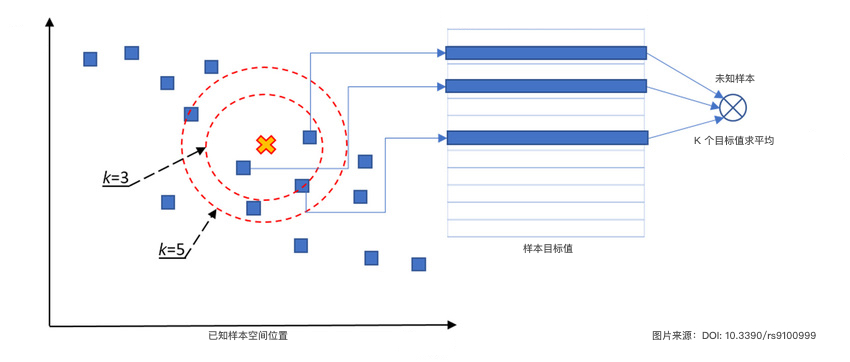


In [4]:
import numpy as np

# 训练样本特征
train_data = np.array(
    [[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]]
)
# 训练样本目标值
train_labels = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

# 测试样本特征
test_data = np.array([[1.2, 1.3], [3.7, 3.5], [5.5, 6.2], [7.1, 7.9]])


def knn_regression(train_data, train_labels, test_data, k):
    test_labels = np.array([])
    for test_point in test_data:
        distances = np.array([])
        for train_point in train_data:
           d = np.sqrt(np.sum(np.square(test_point - train_point)))
           distances = np.append(distances, d)
        sorted_indices = np.argsort(distances)
        k_nearest_labels = train_labels[sorted_indices[:k]]
        y_test = np.mean(k_nearest_labels)
        test_labels = np.append(test_labels, y_test)

    return test_labels


# 测试样本目标值
knn_regression(train_data, train_labels, test_data, k=3)

array([2., 4., 6., 7.])

示例预测结果


假设输入数据如下：

训练数据：特征和目标值一一对应，如(1,1) → 1，(2,2) → 2，依此类推。

测试数据：

[1.2, 1.3]：最近的3个邻居是(1,1)、(2,2)、(3,3)，预测值为(1+2+3)/3 = 2。

[3.7, 3.5]：最近的3个邻居是(3,3)、(4,4)、(2,2)，预测值为(3+4+2)/3 = 3。

其他测试点类似计算。